                                    ***Sakib Mizan_A_2154901009 ML Final Project***

### Importing Libraries

In [1001]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Dataset

In [1002]:
dataset = pd.read_csv('14-StudentsPerformance.csv')
dataset.head(20)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [1003]:
dataset.shape

(1000, 8)

### Check Dataset for Missing Values

In [1004]:
missing_data = dataset.isnull().sum()
print(missing_data)

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


### Checking for Duplicate Data

In [1005]:
duplicate_data = dataset.duplicated().sum()
print(duplicate_data)

0


### Checking Data Type

In [1006]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### Checking for Unique Entities

In [1007]:
dataset.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

### Statistical Overview of the Dataset

In [1008]:
dataset.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Assigning Independent variables to x & Dependent variables to y

In [1009]:
x = dataset.drop("test preparation course", axis=1)

x.head()

,gender,race/ethnicity,parental level of education,lunch,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,72,72,74
1,female,group C,some college,standard,69,90,88
2,female,group B,master's degree,standard,90,95,93
3,male,group A,associate's degree,free/reduced,47,57,44
4,male,group C,some college,standard,76,78,75


In [1010]:
y = dataset["test preparation course"]

y.head()

0         none
1    completed
2         none
3         none
4         none
Name: test preparation course, dtype: object

### Checking Target Class Imbalance

Class distribution:
test preparation course
none         642
completed    358
Name: count, dtype: int64


Class Percentages:
test preparation course
none         64.2
completed    35.8
Name: proportion, dtype: float64


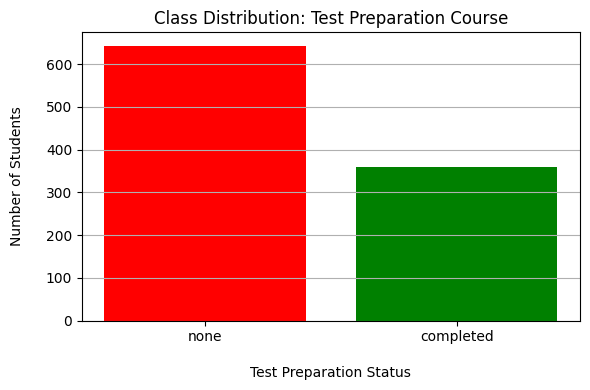

In [1011]:
target_counts = dataset['test preparation course'].value_counts()
print("Class distribution:")
print(target_counts)

print("\n\nClass Percentages:")
print(dataset["test preparation course"].value_counts(normalize=True) * 100)

plt.figure(figsize=(6, 4))
plt.bar(target_counts.index, target_counts.values, color=['#FF0000', '#008000'])

plt.title("Class Distribution: Test Preparation Course")
plt.xlabel("\nTest Preparation Status")
plt.ylabel("Number of Students\n")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

### Encoding Independent variables

In [1012]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(drop = 'first'), [0, 1, 2, 3])], remainder='passthrough')    #use OneHotEncoder(drop = 'first') which Drops first category for each of 4 categorical variables to avoid dummy variable trap
x = pd.DataFrame(ct.fit_transform(x), columns = ct.get_feature_names_out())

print(pd.DataFrame(x))
#print(x)

     encoder__gender_male  encoder__race/ethnicity_group B  \
0                     0.0                              1.0   
1                     0.0                              0.0   
2                     0.0                              1.0   
3                     1.0                              0.0   
4                     1.0                              0.0   
..                    ...                              ...   
995                   0.0                              0.0   
996                   1.0                              0.0   
997                   0.0                              0.0   
998                   0.0                              0.0   
999                   0.0                              0.0   

     encoder__race/ethnicity_group C  encoder__race/ethnicity_group D  \
0                                0.0                              0.0   
1                                1.0                              0.0   
2                                0.0

### Encoding Dependent variables

In [1013]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y) #assigned 0 & 1 in alphabetical order thus 0 = completed & 1 = none

print(pd.DataFrame(y))
#print(y)

     0
0    1
1    0
2    1
3    1
4    1
..  ..
995  0
996  1
997  0
998  0
999  1

[1000 rows x 1 columns]


### Splitting Data into Training & Testing set

In [1014]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 14), (200, 14), (800,), (200,))

### Building Optimal Model using statsmodel.api

### Training model on the Training Set

In [1015]:
import statsmodels.api as sm
x_train_opt = sm.add_constant(x_train)
x_train_opt = x_train_opt.astype(np.float64)
model_train = sm.Logit(y_train, x_train_opt).fit()

print(model_train.summary())

Optimization terminated successfully.
         Current function value: 0.494277
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      785
Method:                           MLE   Df Model:                           14
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                  0.2357
Time:                        22:34:34   Log-Likelihood:                -395.42
converged:                       True   LL-Null:                       -517.34
Covariance Type:            nonrobust   LLR p-value:                 5.424e-44
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const               

### Evaluating Performance & Confusion Matrix

Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.54      0.61        79
           1       0.74      0.84      0.79       121

    accuracy                           0.72       200
   macro avg       0.72      0.69      0.70       200
weighted avg       0.72      0.72      0.72       200

Confusion Matrix:
 [[ 43  36]
 [ 19 102]]


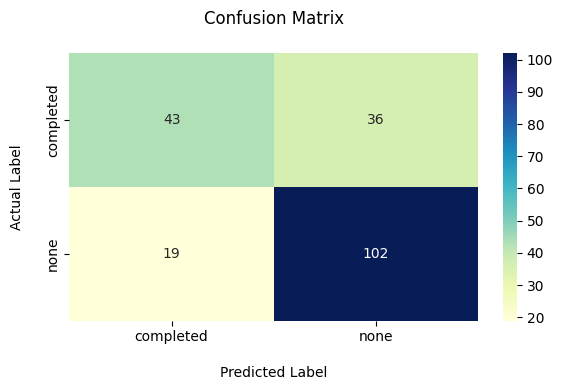

In [1016]:
#Predict probabilities
x_test_opt = sm.add_constant(x_test).astype(np.float64)
y_pred = model_train.predict(x_test_opt)
y_pred_class = (y_pred > 0.5).astype(int)

#Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### ROC Curve & AUC Score

AUC Score: 0.8038497750810755


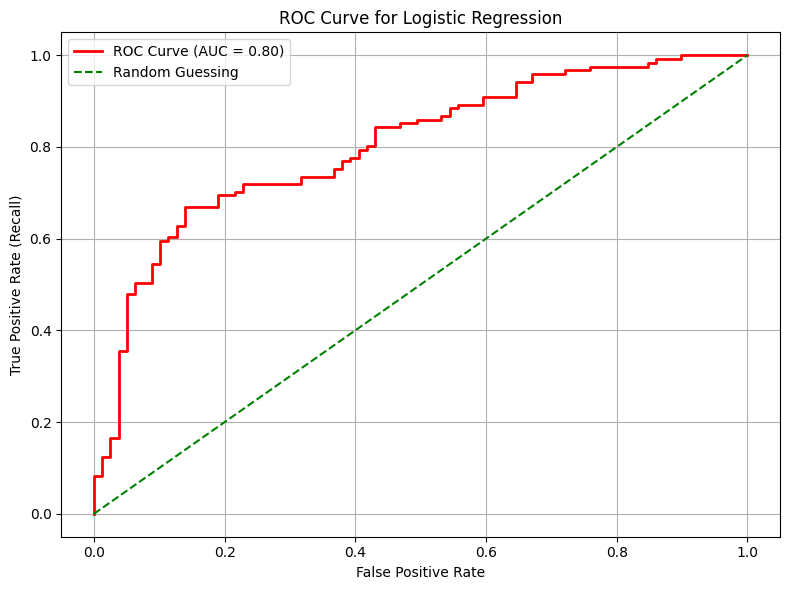

In [1017]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_score = roc_auc_score(y_test, y_pred)
print("AUC Score:", auc_score)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', linewidth=2, label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Best Threshold

🔍 Best Threshold:  0.76
📈 Best F1-Score:  0.74


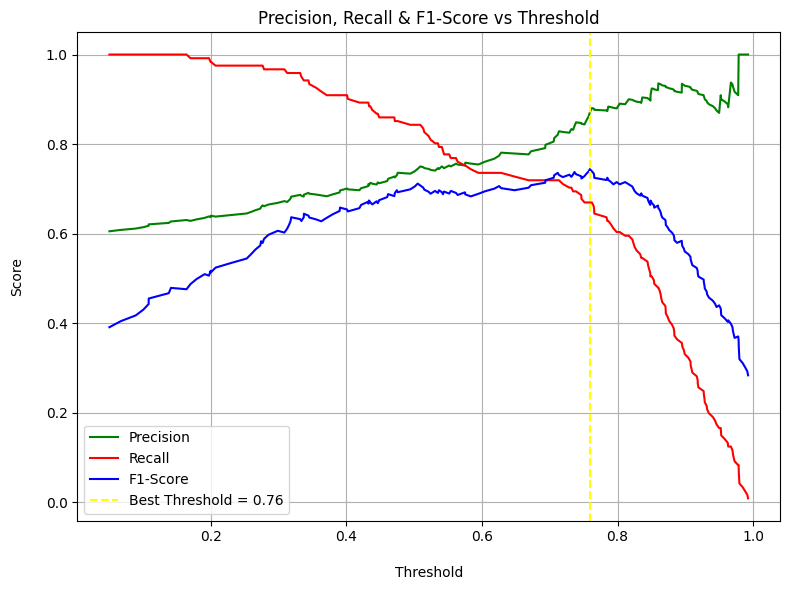

In [1018]:
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
macro_f1_scores = [f1_score(y_test, (y_pred > t).astype(int), average='macro') for t in thresholds]

best_index = np.argmax(macro_f1_scores)
best_threshold = thresholds[best_index]
best_f1_score = macro_f1_scores[best_index]

print(f"🔍 Best Threshold: {best_threshold: .2f}")
print(f"📈 Best F1-Score: {best_f1_score: .2f}")

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label = 'Precision', color = 'green')
plt.plot(thresholds, recall[:-1], label = 'Recall', color = 'red')
plt.plot(thresholds, macro_f1_scores, label = 'F1-Score', color = 'blue')
plt.axvline(x = best_threshold, color = 'yellow', linestyle = '--', label = f'Best Threshold = {best_threshold:.2f}')
plt.xlabel("\nThreshold")
plt.ylabel("Score\n")
plt.title("Precision, Recall & F1-Score vs Threshold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Evaluating Performance & Convolution Matrix using Best Threshold

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        79
           1       0.88      0.67      0.76       121

    accuracy                           0.74       200
   macro avg       0.76      0.77      0.74       200
weighted avg       0.78      0.74      0.75       200

Confusion Matrix:
 [[68 11]
 [40 81]]


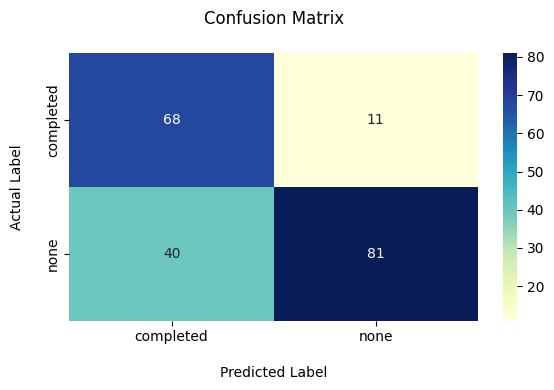

In [1019]:
y_pred_class = (y_pred > best_threshold).astype(int)

#Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### Middle Threshold

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.73      0.68        79
           1       0.81      0.72      0.76       121

    accuracy                           0.72       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.74      0.72      0.73       200

Confusion Matrix:
 [[58 21]
 [34 87]]


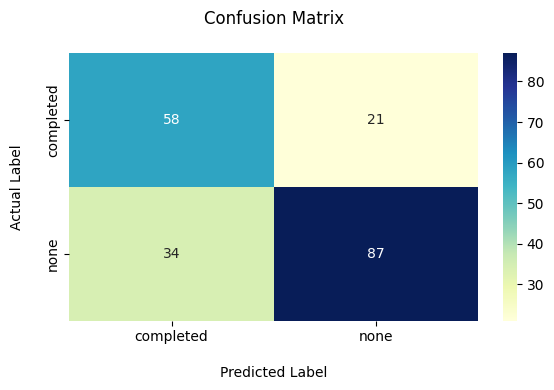

In [1020]:
y_pred_class = (y_pred > 0.70).astype(int)

#Evaluate performance
from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class))

cm = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### Handling Class Imbalance

In [1021]:
weights = np.where(y_train == 0, 642 / 358, 1)

model_train_weights = sm.GLM(y_train, x_train_opt, family=sm.families.Binomial(), freq_weights=weights).fit()
print(model_train_weights.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                  800
Model:                            GLM   Df Residuals:                  1006.33
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -538.05
Date:                Tue, 24 Jun 2025   Deviance:                       1076.1
Time:                        22:34:36   Pearson chi2:                     996.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3457
Covariance Type:            nonrobust                                         
                                                             coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------

### Evaluating Performance & Confusion Matrix after Handling Class Imbalance

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.68      0.65        79
           1       0.78      0.73      0.75       121

    accuracy                           0.71       200
   macro avg       0.70      0.71      0.70       200
weighted avg       0.72      0.71      0.71       200

Confusion Matrix:
 [[54 25]
 [33 88]]


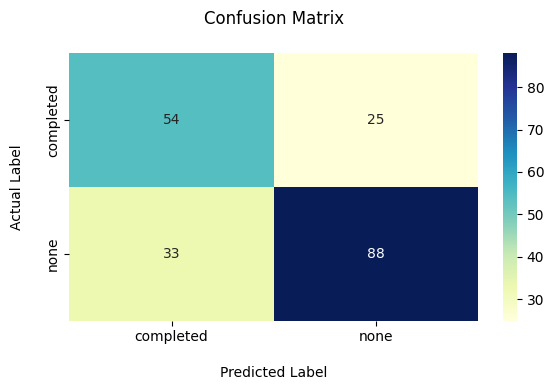

In [1022]:
y_pred_weights = model_train_weights.predict(x_test_opt)
y_pred_class_weights = (y_pred_weights > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class_weights))

cm = confusion_matrix(y_test, y_pred_class_weights)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### ROC Curve & AUC Score After Handling Imbalance

AUC Score: 0.8023851867350141


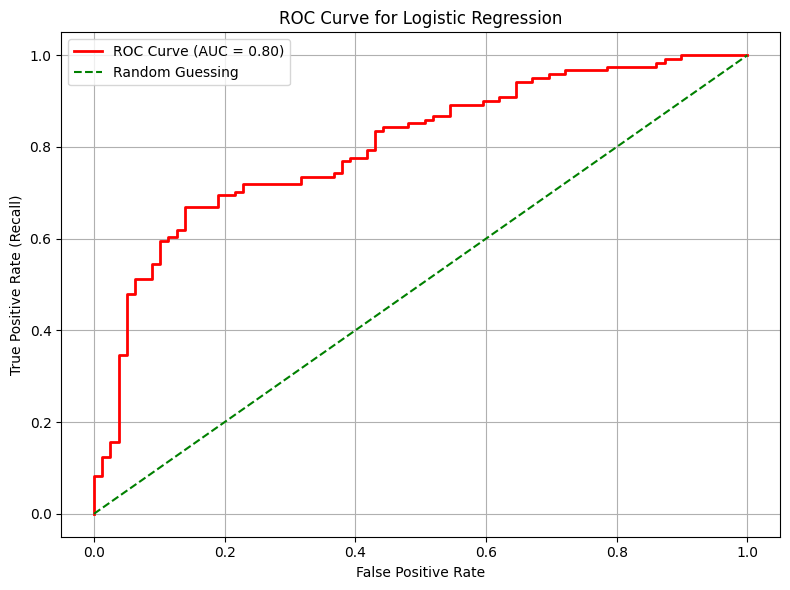

In [1023]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds = roc_curve(y_test, y_pred_weights)
auc_score_weights = roc_auc_score(y_test, y_pred_weights)
print("AUC Score:", auc_score_weights)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', linewidth=2, label=f'ROC Curve (AUC = {auc_score_weights:.2f})')
plt.plot([0, 1], [0, 1], color='green', linestyle='--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve for Logistic Regression")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Best Threshold after Imbalance Handling

🔍 Best Threshold:  0.64
📈 Best F1-Score:  0.76


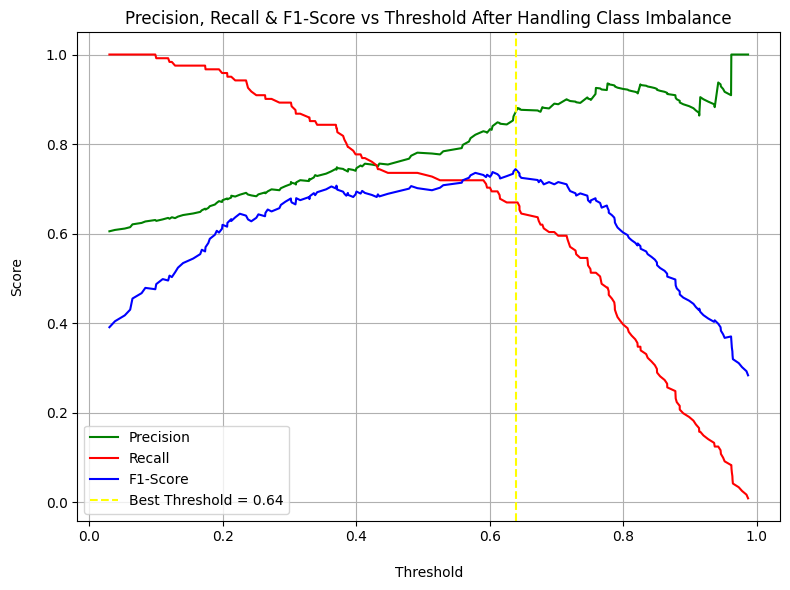

In [1029]:
from sklearn.metrics import precision_recall_curve, f1_score

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_weights)
macro_f1_scores_weights = [f1_score(y_test, (y_pred_weights > t).astype(int), average='macro') for t in thresholds]

best_index_weights = np.argmax(macro_f1_scores_weights)
best_threshold_weights = thresholds[best_index_weights]
best_f1_score_weights = f1_scores[best_index_weights]

print(f"🔍 Best Threshold: {best_threshold_weights: .2f}")
print(f"📈 Best F1-Score: {best_f1_score_weights: .2f}")

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label = 'Precision', color = 'green')
plt.plot(thresholds, recall[:-1], label = 'Recall', color = 'red')
plt.plot(thresholds, macro_f1_scores_weights, label = 'F1-Score', color = 'blue')
plt.axvline(x=best_threshold_weights, color = 'yellow', linestyle = '--', label = f'Best Threshold = {best_threshold_weights:.2f}')
plt.xlabel("\nThreshold")
plt.ylabel("Score\n")
plt.title("Precision, Recall & F1-Score vs Threshold After Handling Class Imbalance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Evaluating Performance & Convolution Matrix using Best Threshold After Handling Imbalance

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        79
           1       0.88      0.67      0.76       121

    accuracy                           0.74       200
   macro avg       0.76      0.77      0.74       200
weighted avg       0.78      0.74      0.75       200

Confusion Matrix:
 [[68 11]
 [40 81]]


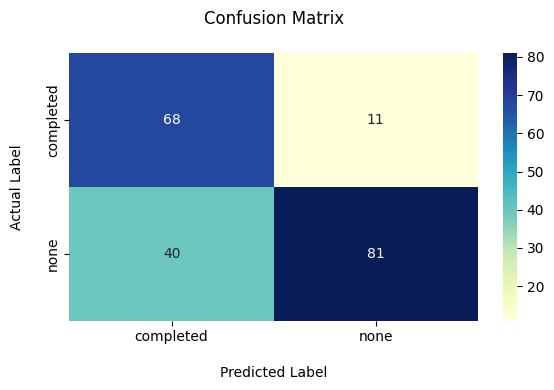

In [1025]:
y_pred_weights = model_train_weights.predict(x_test_opt)
y_pred_class_weights = (y_pred_weights > best_threshold_weights).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class_weights))

cm = confusion_matrix(y_test, y_pred_class_weights)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### Middle Threshold after Imbalance Handling

Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.89      0.71        79
           1       0.89      0.60      0.71       121

    accuracy                           0.71       200
   macro avg       0.74      0.74      0.71       200
weighted avg       0.77      0.71      0.71       200

Confusion Matrix:
 [[70  9]
 [49 72]]


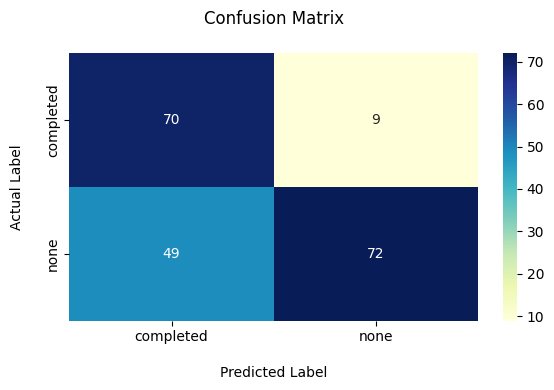

In [1026]:
y_pred_weights = model_train_weights.predict(x_test_opt)
y_pred_class_weights = (y_pred_weights > 0.70).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred_class_weights))

cm = confusion_matrix(y_test, y_pred_class_weights)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(6, 4))

sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

### Training on Full Dataset

In [1027]:
import statsmodels.api as sm
x_opt = sm.add_constant(x)
x_opt = x_opt.astype(np.float64)
regressor_logit = sm.Logit(y, x_opt).fit()

print(regressor_logit.summary())

Optimization terminated successfully.
         Current function value: 0.499256
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      985
Method:                           MLE   Df Model:                           14
Date:                Tue, 24 Jun 2025   Pseudo R-squ.:                  0.2346
Time:                        22:34:39   Log-Likelihood:                -499.26
converged:                       True   LL-Null:                       -652.26
Covariance Type:            nonrobust   LLR p-value:                 6.604e-57
                                                             coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
const               

### Prediction Matrix & Confusion Matrix

Confusion Matrix:
[[198 160]
 [101 541]]


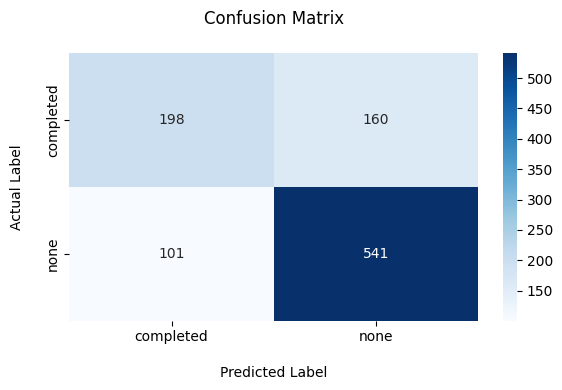

              precision    recall  f1-score   support

           0       0.63      0.73      0.68        79
           1       0.81      0.72      0.76       121

    accuracy                           0.72       200
   macro avg       0.72      0.73      0.72       200
weighted avg       0.74      0.72      0.73       200



In [1028]:
# Get predicted probabilities and classes
pred_probabilities = regressor_logit.predict(x_opt)
pred_classes = (pred_probabilities > 0.5).astype(int)

#Get Confusion Matrix
confusion_matrix = pd.crosstab(y, pred_classes)
print("Confusion Matrix:")
print(confusion_matrix.values)

class_names = ['completed', 'none']

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['completed', 'none'],
            yticklabels=['completed', 'none'])

plt.title("Confusion Matrix\n")
plt.xlabel("\nPredicted Label")
plt.ylabel("Actual Label\n")
plt.tight_layout()
plt.show()

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred_class))